In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
nb = pd.read_csv('../Dataset/NB.csv')
nb['Fault'] = 0

ir = pd.read_csv('../Dataset/OR007.csv')
ir['Fault'] = 1

In [3]:
dataset = nb.append(ir)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_5896\156461942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(ir)


,DE,FE,Fault
0,0.046104,0.023216,0
1,-0.037134,0.081155,0
2,-0.089496,0.095331,0
3,-0.084906,0.091016,0
4,-0.038594,0.038625,0
...,...,...,...
486799,2.090005,0.362627,1
486800,1.752383,0.192305,1
486801,1.079641,0.018080,1
486802,0.243305,-0.112178,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
classifier_b = Sequential()

In [9]:
classifier_b.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [10]:
classifier_b.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [11]:
classifier_b.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
classifier_b.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [13]:
classifier_b.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = False)


Epoch 1/20
24268/24268 [==============================] - 152s 6ms/step - loss: 0.3898 - accuracy: 0.8230
Epoch 2/20
24268/24268 [==============================] - 152s 6ms/step - loss: 0.2473 - accuracy: 0.9036
Epoch 3/20
24268/24268 [==============================] - 155s 6ms/step - loss: 0.2466 - accuracy: 0.9039
Epoch 4/20
24268/24268 [==============================] - 157s 6ms/step - loss: 0.2465 - accuracy: 0.9039
Epoch 5/20
24268/24268 [==============================] - 157s 6ms/step - loss: 0.2464 - accuracy: 0.9040
Epoch 6/20
24268/24268 [==============================] - 157s 6ms/step - loss: 0.2464 - accuracy: 0.9040
Epoch 7/20
24268/24268 [==============================] - 154s 6ms/step - loss: 0.2463 - accuracy: 0.9040
Epoch 8/20
24268/24268 [==============================] - 156s 6ms/step - loss: 0.2463 - accuracy: 0.9040
Epoch 9/20
24268/24268 [==============================] - 155s 6ms/step - loss: 0.2463 - accuracy: 0.9040
Epoch 10/20
24268/24268 [=====================

In [14]:
y_pred = classifier_b.predict(X_test)
y_pred = (y_pred > 0.5)

6067/6067 [==============================] - 23s 4ms/step


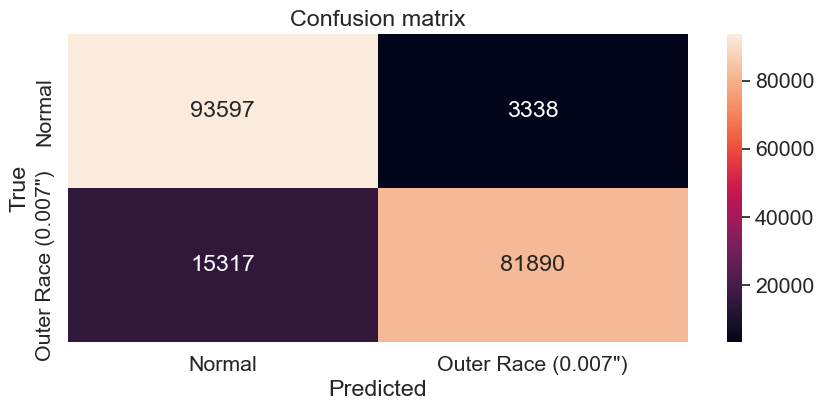

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.007")']  
columns = ['Normal', 'Outer Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [16]:
classifier_b.evaluate(X_test, y_test)

6067/6067 [==============================] - 18s 3ms/step - loss: 0.2457 - accuracy: 0.9039


[0.2457181215286255, 0.9039105176925659]

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.86      0.97      0.91     96935
Outer Race (0.007")       0.96      0.84      0.90     97207

           accuracy                           0.90    194142
          macro avg       0.91      0.90      0.90    194142
       weighted avg       0.91      0.90      0.90    194142



In [18]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 18655


6067/6067 [==============================] - 15s 2ms/step


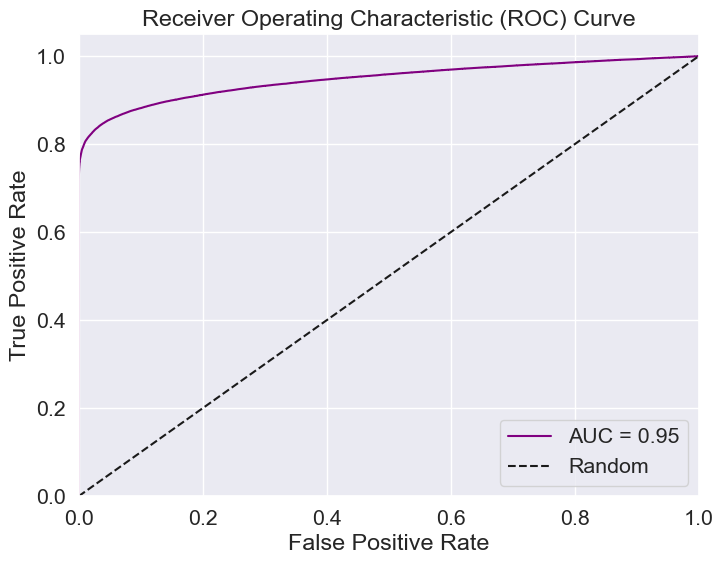

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtain predicted probabilities for the positive class
y_prob = classifier_b.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
np.savez("roc_data_OR007.npz", fpr=fpr, tpr=tpr, thresholds=thresholds)
# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()